In [191]:
import numpy as np
import pandas as pd

In [192]:
df = pd.read_csv('spam.csv')

In [193]:
df.sample(13)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3503,ham,Will you be here for food,NaN,NaN,NaN
1605,ham,When you came to hostel.,NaN,NaN,NaN
3686,ham,Great! I shoot big loads so get ready!,NaN,NaN,NaN
4273,ham,Ball is moving a lot.will spin in last :)so ve...,NaN,NaN,NaN
1779,spam,"Loan for any purpose �500 - �75,000. Homeowner...",NaN,NaN,NaN
3609,ham,"Call me. I m unable to cal. Lets meet bhaskar,...",NaN,NaN,NaN
2923,ham,Thts god's gift for birds as humans hav some n...,NaN,NaN,NaN
3716,ham,I'm gonna rip out my uterus.,NaN,NaN,NaN
196,ham,Did u got that persons story,NaN,NaN,NaN
4299,ham,Erm... Woodland avenue somewhere. Do you get t...,NaN,NaN,NaN


In [194]:
#Steps we are going to follow:-
#1. Data Cleaning
#2. EDA (Exploratory Data Analysis)
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvements

#1. Data Cleaning

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [196]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [197]:
df.sample(13)

,v1,v2
2624,ham,S da..al r above &lt;#&gt;
432,spam,Congrats! Nokia 3650 video camera phone is you...
3671,ham,"came to look at the flat, seems ok, in his 50..."
1182,ham,"K give me a sec, breaking a &lt;#&gt; at cstore"
779,ham,That means get the door
2497,ham,Dai what this da.. Can i send my resume to thi...
2992,ham,So i'm doing a list of buyers.
1347,ham,She doesnt need any test.
4346,spam,U 447801259231 have a secret admirer who is lo...
3017,ham,I didn't get the second half of that message


In [198]:
#renaming columns v1 and v2
df.rename(columns={'v1':'Class','v2':'SMS'},inplace=True)

In [199]:
df.sample(13)

,Class,SMS
5161,ham,Lol no. I just need to cash in my nitros. Hurr...
1613,ham,Thnx dude. u guys out 2nite?
710,ham,Height of Confidence: All the Aeronautics prof...
602,ham,Speaking of does he have any cash yet?
910,ham,My love ! How come it took you so long to leav...
1845,ham,Hi. || Do u want | to join me with sts later? ...
4847,ham,S.this will increase the chance of winning.
4929,spam,"Hi, the SEXYCHAT girls are waiting for you to ..."
4471,spam,3. You have received your mobile content. Enjoy
2667,ham,Why de. You looking good only:-)..


In [200]:
#As the above classes are described as either 'ham' or 'spam'
#We will provide them numerical values '0' and '1'
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Class"] = encoder.fit_transform(df['Class'])

In [201]:
df.head()

,Class,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [202]:
#Checking for missing values
df.isnull().sum()

Class    0
SMS      0
dtype: int64

In [203]:
#Checking for duplicate values
df.duplicated().sum()

403

In [204]:
#Removing duplicate values
df = df.drop_duplicates(keep='first')

In [205]:
#Cross-checking duplicate values
df.duplicated().sum()

0

In [206]:
#data cleaning completed

#2. EDA

In [207]:
df.head()

,Class,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [208]:
#Counting number of values in Class
df['Class'].value_counts()

0    4516
1     653
Name: Class, dtype: int64

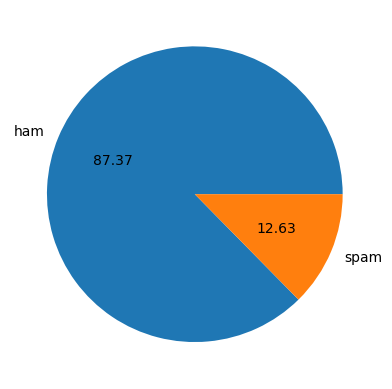

In [209]:
#Representing value count using Pie Chart
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [210]:
#Data is imbalanced

In [211]:
#importing Natural Language Toolkit library
import nltk

In [212]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [213]:
#Adding new column for number of characters
df['Num_Char'] = df['SMS'].apply(len)

In [214]:
df.head()

,Class,SMS,Num_Char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [215]:
#Adding new column for number of words
df['Num_Words'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [216]:
df.head()

,Class,SMS,Num_Char,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [217]:
#Adding new column for number of sentences
df['Num_Sent'] = df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [218]:
df.head()

,Class,SMS,Num_Char,Num_Words,Num_Sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [219]:
#Using describe function to check the functionality of the added columns
df[['Num_Char','Num_Words','Num_Sent']].describe()

,Num_Char,Num_Words,Num_Sent
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [220]:
#Analyzing 'ham'
df[df['Class'] == 0][['Num_Char','Num_Words','Num_Sent']].describe()

,Num_Char,Num_Words,Num_Sent
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [221]:
#Analyzinf 'spam'
df[df['Class'] == 1][['Num_Char','Num_Words','Num_Sent']].describe()

,Num_Char,Num_Words,Num_Sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [222]:
#Plotting Histogram
import seaborn as sns

<Axes: xlabel='Num_Char', ylabel='Count'>

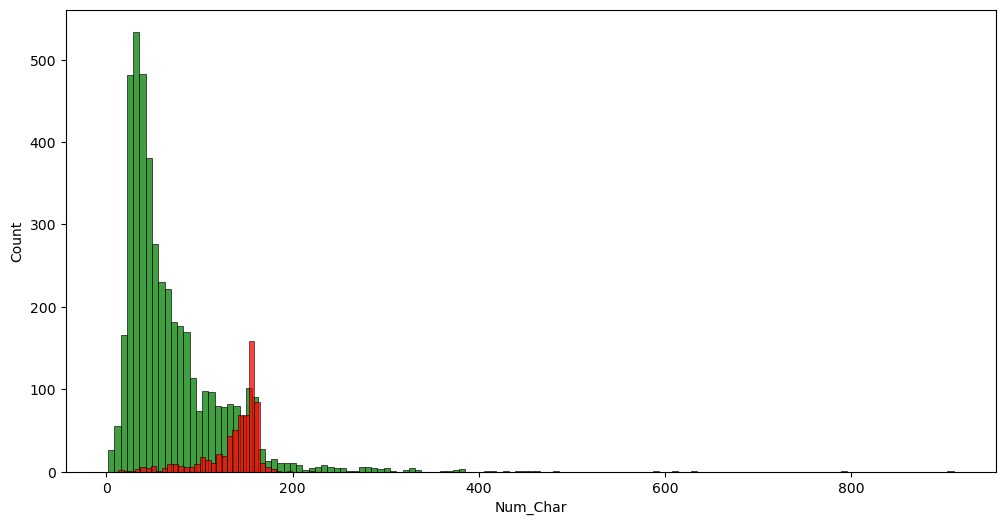

In [223]:
#Histogram for number of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_Char'], color='green')
sns.histplot(df[df['Class'] == 1]['Num_Char'], color='red')

<Axes: xlabel='Num_Words', ylabel='Count'>

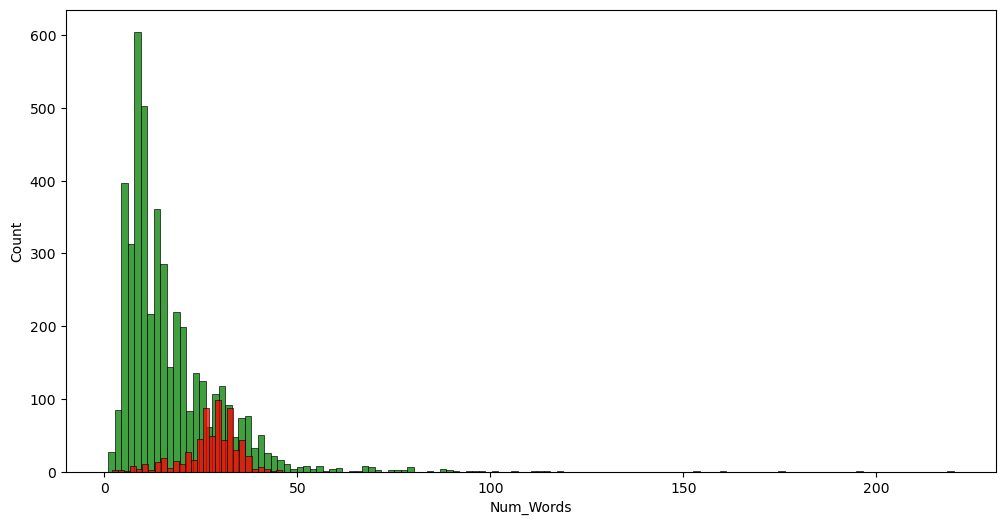

In [224]:
#Histogram for number of words
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_Words'], color='green')
sns.histplot(df[df['Class'] == 1]['Num_Words'], color='red')

<Axes: xlabel='Num_Sent', ylabel='Count'>

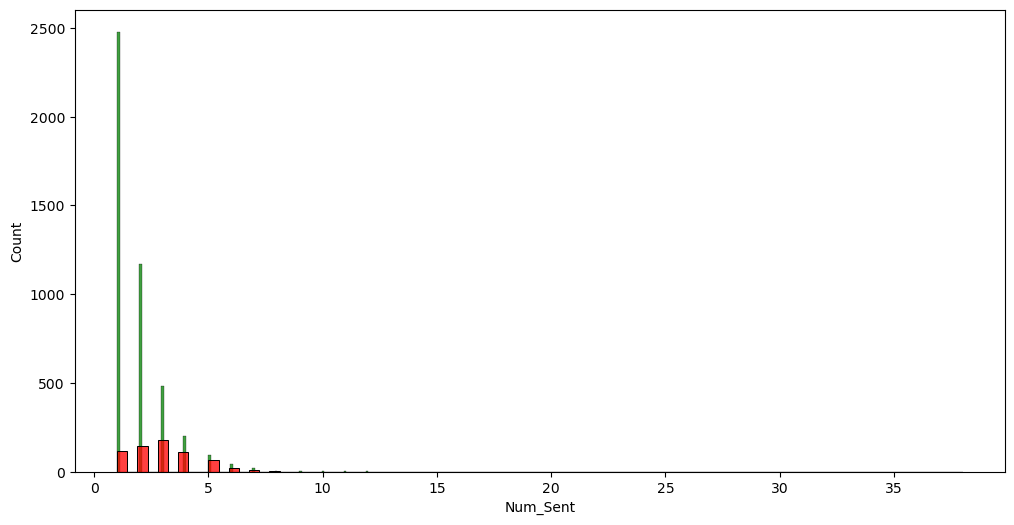

In [225]:
#Histogram for number of sentences
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['Num_Sent'], color='green')
sns.histplot(df[df['Class'] == 1]['Num_Sent'], color='red')

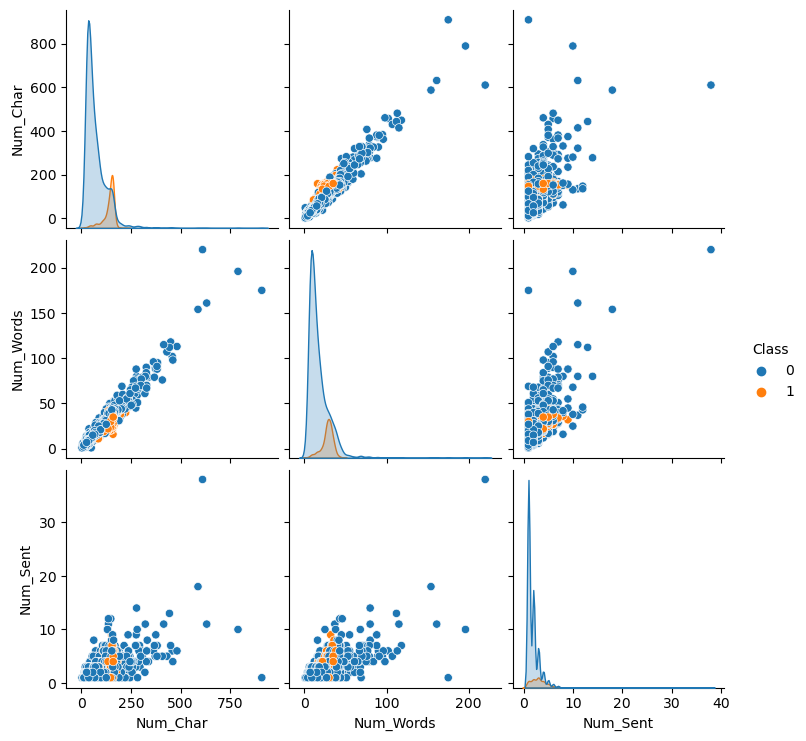

In [226]:
#Checking the relationship between columns Num_Char, Num_Word, Num_Sent
sns.pairplot(df,hue='Class')

C:\Users\Dell\AppData\Local\Temp\ipykernel_9128\2591674069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

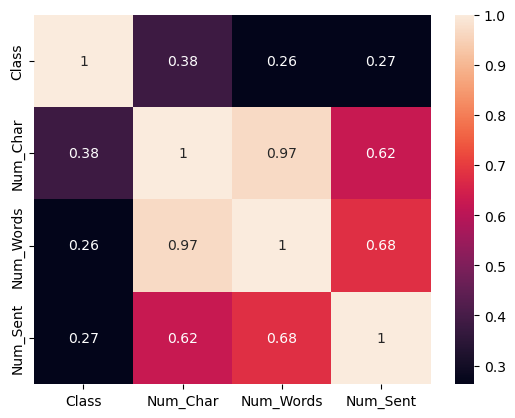

In [227]:
#Finding Correlation Coefficient
sns.heatmap(df.corr(),annot=True)

#3. Text Preprocessing
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [228]:
#Downloading all stopwords for further use
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english') #Displaying all stopwords for demonstration

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [229]:
# importing string library for removing all the punctuations using below function
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [230]:
#importing PorterStemmer to apply stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Swimming') #It will remove 'ing' part of the text... now we will apply same logic in the below function

'swim'

In [231]:
#Creating function to perform steps of Text Preprocessing
def transform_txt(txt):
    txt = txt.lower() #Converting text to lower case
    txt = nltk.word_tokenize(txt) #Tokenization
    
    x = []
    for i in txt:
        if i.isalnum(): #Removing special characters
            x.append(i)
    
    txt = x[:]
    x.clear()

    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)

    txt = x[:]
    x.clear()

    for i in txt:
        x.append(ps.stem(i))
            
    return " ".join(x)

In [232]:
#Using above function, we have converted text to lower case, done tokenization and removing special characters
#and then remove all the stop words and punctuations

In [233]:
#Example 1
transform_txt('Hello My name is Preyansh Sharma and I am @19 years old')

'hello name preyansh sharma 19 year old'

In [234]:
#Example 2
transform_txt("This is my project for detecting spam sms, using machine learning!")

'project detect spam sm use machin learn'

In [235]:
df['Transformed_Text'] = df['SMS'].apply(transform_txt)

In [236]:
df.head()

,Class,SMS,Num_Char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [237]:
#Creating word cloud i.e. highlighting important words of the text

#word cloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

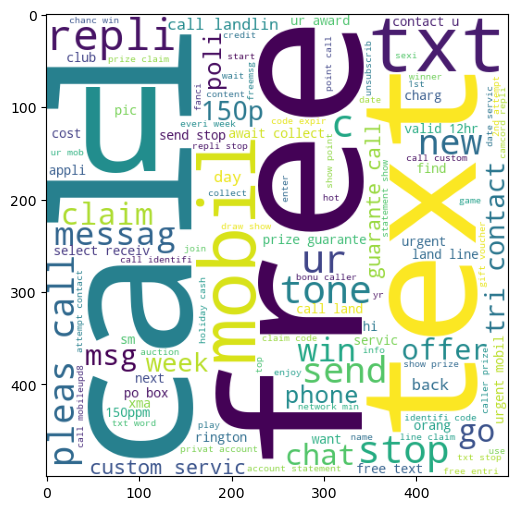

In [238]:
#Generating wordcloud for 'spam' messages
spam_wc = wc.generate(df[df['Class'] == 1]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

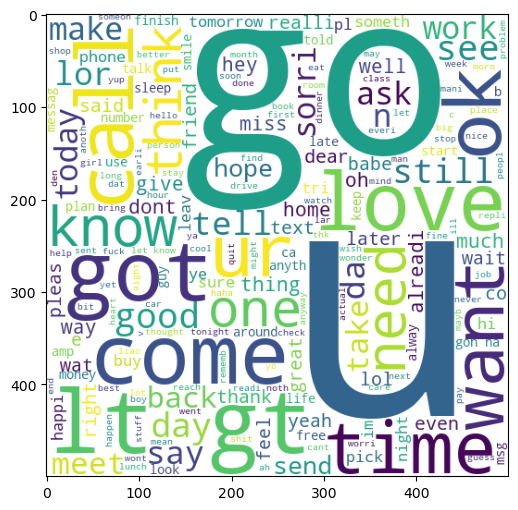

In [239]:
#Generating wordcloud for 'ham' messages
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['Class'] == 0]['Transformed_Text'].str.cat(sep=" "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [240]:
df.head()

,Class,SMS,Num_Char,Num_Words,Num_Sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [241]:
#We will find which word is used the most in the 'spam' messages
spam_corpus = []
for msg in df[df['Class'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [242]:
len(spam_corpus)

9941

In [243]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(15))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [244]:
#We will find which word is used the most in the 'ham' messages
ham_corpus = []
for msg in df[df['Class'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [245]:
len(ham_corpus)

35305

In [246]:
pd.DataFrame(Counter(ham_corpus).most_common(15))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


#4. Model Building

In [247]:
#Now we will begin the model building process and we will use Naive Bayes algorithm, as generally it works best on textual data

#Initiating with vectorization using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [248]:
X = cv.fit_transform(df['Transformed_Text']).toarray()
X.shape

(5169, 6677)

In [249]:
y = df['Class'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [250]:
#Selecting model to perform predictive analysis
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [252]:
#Including three naive bayes based algorithms
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [253]:
#Creating object for each model
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [254]:
#Performing predictive analysis using gnb algorithm
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [255]:
#Performing predictive analysis using mnb algorithm
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [256]:
#Performing predictive analysis using bnb algorithm
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [257]:
#Now we will compare the vectorization between CountVectorizer and TfidfVectorizer

#Initiating with vectorization using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [258]:
a = tfidf.fit_transform(df['Transformed_Text']).toarray()

In [259]:
a.shape

(5169, 6677)

In [260]:
b = df['Class'].values
b

array([0, 0, 1, ..., 0, 0, 0])

In [261]:
a_train, a_test, b_train, b_test = train_test_split(a,b,test_size=0.2,random_state=2)

In [262]:
#Performing predictive analysis using gnb algorithm
gnb.fit(a_train,b_train)
b_pred1 = gnb.predict(a_test)
print(accuracy_score(b_test,b_pred1))
print(confusion_matrix(b_test,b_pred1))
print(precision_score(b_test,b_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


In [263]:
#Performing predictive analysis using mnb algorithm
mnb.fit(a_train,b_train)
b_pred2 = mnb.predict(a_test)
print(accuracy_score(b_test,b_pred2))
print(confusion_matrix(b_test,b_pred2))
print(precision_score(b_test,b_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [264]:
#Performing predictive analysis using bnb algorithm
bnb.fit(a_train,b_train)
b_pred3 = bnb.predict(a_test)
print(accuracy_score(b_test,b_pred3))
print(confusion_matrix(b_test,b_pred3))
print(precision_score(b_test,b_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [265]:
#We switched to TfidfVectorizer it turns outu that mnb precision score has increased
#Thus we will use the mnb algorithm with tfdif vectorizer

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))